In [108]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadanie 2

In [109]:
class NumericalMethod2d():
    def __init__(self,updates = None):
        self.updates = updates
        
    def add_step(self,update):
        if self.updates is None:
            self.updates = update
        else:
            self.updates = np.vstack((self.updates,update))
        
    @property
    def update_count(self):
        return self.updates.shape[0]-1
    
    def __call__(self,f1,f2,tn,y1n,y2n,h):
        k = np.zeros(shape=(self.update_count,2))
        for i in range(self.update_count):
            a = self.updates[i,0]
            b = self.updates[i,1:]
            k[i,0] = h * f1(tn+a*h,y1n+b.dot(k[:,0].T),y2n+b.dot(k[:,1].T))
            k[i,1] = h * f2(tn+a*h,y1n+b.dot(k[:,0].T),y2n+b.dot(k[:,1].T))
        c = self.updates[self.update_count,1:]
        return c.dot(k[:,0].T),c.dot(k[:,1].T)

In [110]:
def draw_system(method, start_x, start_y, start_dy, f1, f2, y = None, dy = None, step = 0.1):
    count = np.ceil(10.0/step)
    X = np.linspace(start_x,start_x+10,count)
    Y = np.zeros_like(X)
    DY = np.zeros_like(X)
    local_errors = np.zeros_like(X)
    Y[0] = start_y
    DY[0] = start_dy
    if y and dy:
        real_y = y(X)
        real_dy = dy(X)
    for i in np.arange(1,count):
        y_next, dy_next = method(f1=f1,f2=f2,tn=X[i-1],y1n=Y[i-1],y2n=DY[i-1],h=step)
        Y[i] = Y[i-1] + y_next
        DY[i] = DY[i-1] + dy_next
        if y and dy:
            y_next, dy_next = method(f1=f1,f2=f2,tn=X[i-1],y1n=real_y[i-1],y2n=real_dy[i-1],h=step)
            local_errors[i] = np.abs(real_y[i]-real_y[i-1] - y_next) + np.abs(real_dy[i]-real_dy[i-1]-dy_next)
    if y and dy:
        global_errors = np.abs(Y-real_y) + np.abs(DY - real_dy)

    plt.figure(figsize = (9,9))
    if y and dy:
        plt.subplot(4,1,1)
        plt.plot(X,Y, color = 'blue', label ='y_approximation')
        plt.plot(X,DY,color = 'red', label='dy_approximation')
        plt.legend(loc = 'upper left')
    
        plt.plot(X,real_y,color = 'darkblue', label='function value',linestyle='--')
        plt.plot(X,real_dy,color = 'darkred', label='deriv value',linestyle='--')
        plt.legend(loc = 'upper left')
        
        plt.subplot(4,1,2)
        plt.plot(X,global_errors,label ='global error')
        plt.legend(loc = 'upper left')
        
        plt.subplot(4,1,3)
        plt.plot(X,local_errors,label='local_error')
        plt.legend(loc = 'upper left')
        
        plt.subplot(4,1,4)
        plt.plot(Y,DY, label='phase space')
        plt.legend(loc= 'upper left')
    else:
        plt.subplot(2,1,1)
        plt.plot(X,Y, color = 'blue', label ='y_approximation')
        plt.plot(X,DY,color = 'red', label='dy_approximation')
        plt.legend(loc = 'upper left')
        
        plt.subplot(2,1,2)
        plt.plot(Y,DY, label='phase space')
        plt.legend(loc= 'upper left')
    plt.show()

In [111]:
euler = NumericalMethod2d(np.array([[1.,0.],[0.,1.]]))

In [112]:
heuns = NumericalMethod2d(
    np.array([[0.,0.,0.],
              [1.,1.,0.],
              [0.,.5,.5]]))

In [113]:
merson = NumericalMethod2d(
    np.array([[0.,0.,0.,0.,0.,0.],
              [1./3.,1./3.,0.,0.,0.,0.],
              [1./3.,1./6.,1./6.,0.,0.,0.],
              [1./2.,1./8.,0.,3./8.,0.,0.],
              [1.,1./2.,0.,-3./2.,2.,0.],
              [0.,1./6.,0.,0.,2./3.,1./6.]]))

In [114]:
L = 2.
g = 10.
Theta_0 = 2.

## Równanie liniowe

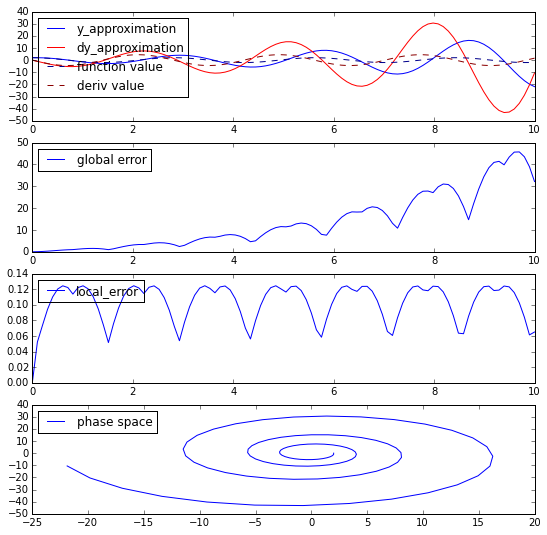

In [115]:
draw_system(euler,
            0,
            Theta_0,
            0,
            lambda t,y,v: v,
            lambda t,y,v: -g/L*y,
            y = lambda t:Theta_0*np.cos(np.sqrt(g/L)*t),
            dy = lambda t:-Theta_0*np.sqrt(g/L)*sin(np.sqrt(g/L)*t))

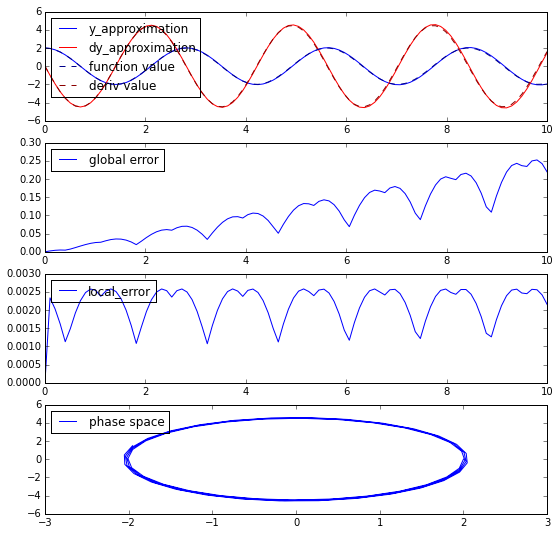

In [116]:
draw_system(heuns,
            0,
            Theta_0,
            0,
            lambda t,y,v: v,
            lambda t,y,v: -g/L*y,
            y = lambda t:Theta_0*np.cos(np.sqrt(g/L)*t),
            dy = lambda t:-Theta_0*np.sqrt(g/L)*sin(np.sqrt(g/L)*t))

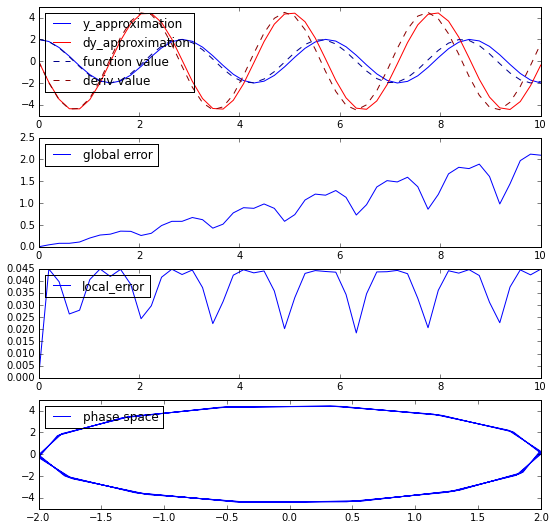

In [117]:
draw_system(merson,
            0,
            Theta_0,
            0,
            lambda t,y,v: v,
            lambda t,y,v: -g/L*y,
            y = lambda t:Theta_0*np.cos(np.sqrt(g/L)*t),
            dy = lambda t:-Theta_0*np.sqrt(g/L)*sin(np.sqrt(g/L)*t),
            step=.2)

## Równanie nieliniowe

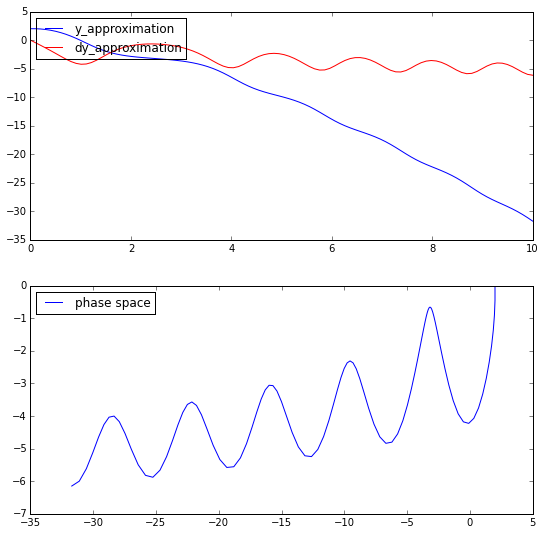

In [118]:
draw_system(euler,0,Theta_0,0,lambda t,y,v: v, lambda t,y,v:-g/L*np.sin(y))

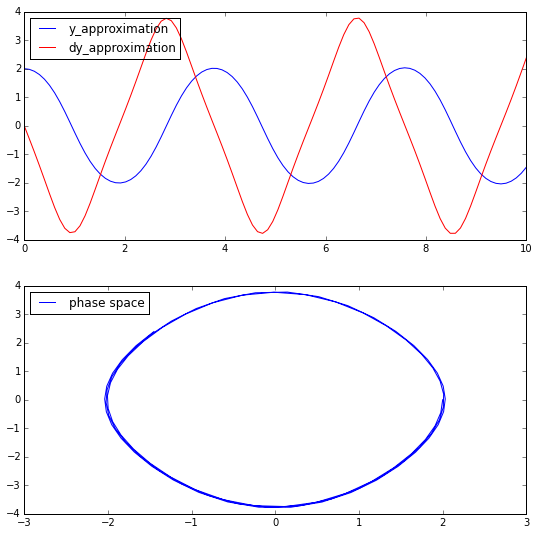

In [119]:
draw_system(heuns,0,Theta_0,0,lambda t,y,v: v, lambda t,y,v:-g/L*np.sin(y))

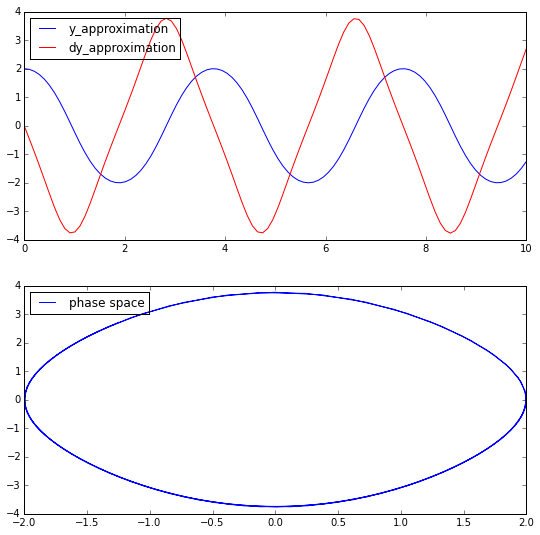

In [121]:
draw_system(merson,0,Theta_0,0,lambda t,y,v: v, lambda t,y,v:-g/L*np.sin(y))

## Zadanie 4: Równanie z uwzględnieniem oporów ruchu

In [127]:
Theta_0 = 2.
c = 0.5
m = 3.

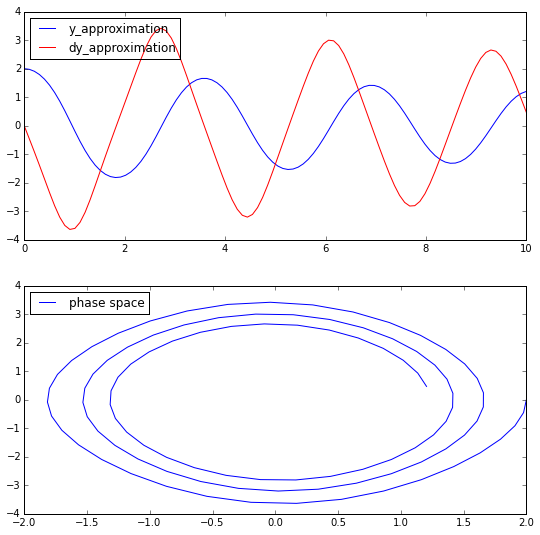

In [129]:
draw_system(merson,
            0,
            Theta_0,
            0,
            lambda t,y,v: v, lambda t,y,v:-c*v/(m*L)-g/L*np.sin(y))

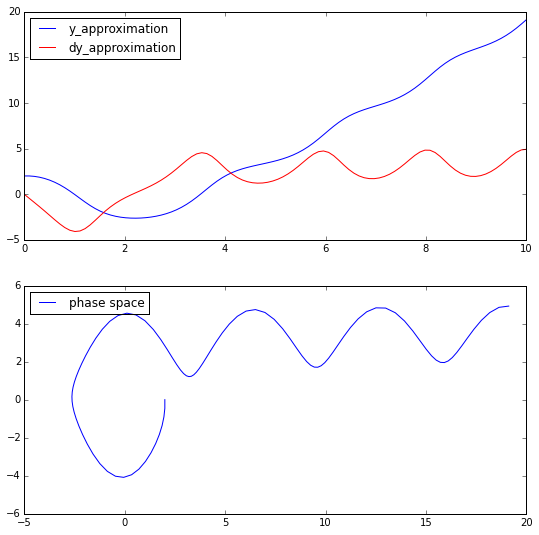

In [132]:
draw_system(euler,
            0,
            Theta_0,
            0,
            lambda t,y,v: v, lambda t,y,v:-c*v/(m*L)-g/L*np.sin(y))

In [133]:
c = 4.

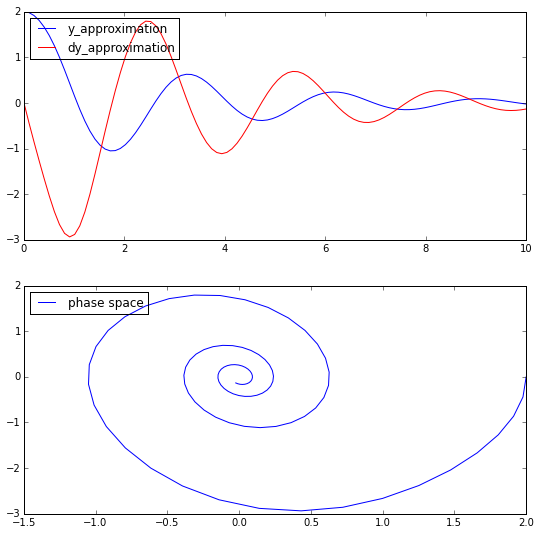

In [134]:
draw_system(merson,
            0,
            Theta_0,
            0,
            lambda t,y,v: v,
            lambda t,y,v:-c*v/(m*L)-g/L*np.sin(y))